# Linear regression by using Deep Neural network: Implement Boston housing price prediction problem by Linear regression using Deep Neural network. Use Boston House price prediction dataset.

In [ ]:
#import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping



In [ ]:
#load the data
# url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV' ]
house_df =  pd.read_csv('/content/housing.csv', sep= '\s+', names=col_names )
# house_df = pd.read_csv('/content/housing.csv')
house_df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
'''====== Data Exploration and Preprocessing ======'''

#shape of dataframe
house_df.shape

(506, 14)

In [ ]:
#check there are any NAN values
house_df.isnull().values.any()

False

In [ ]:
'''=== show the statistics analysis of each attributes ==='''

#descriptive statistics 
house_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


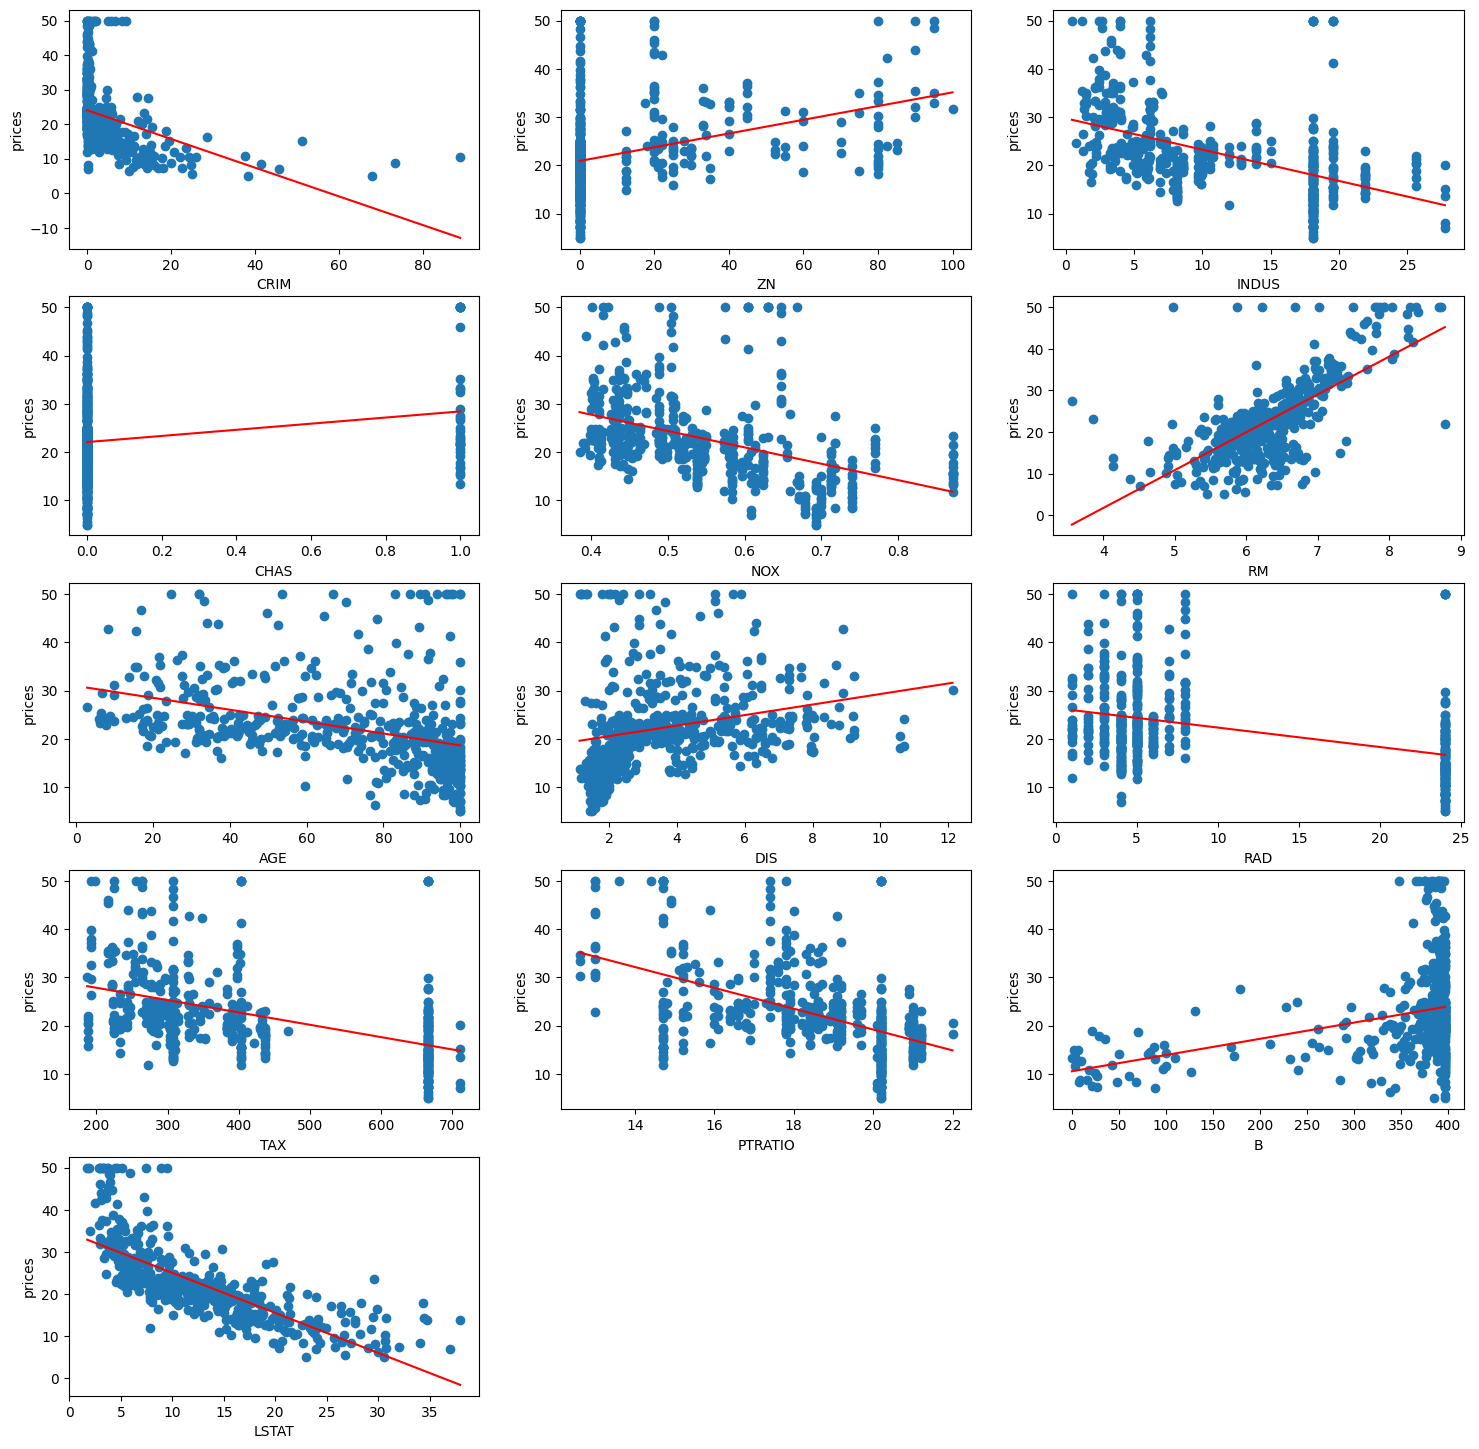

In [ ]:
'''=== Show the linear relationship between features  and price (MEDV). Thus, it provides that how the scattered 
      they are and which features has more impact in prediction of house price. ==='''

# visiualize all variables  with price(MEDV)
from scipy import stats
#creates figure
plt.figure(figsize=(18, 18))

for i, col in enumerate(house_df.columns[0:13]): #iterates over all columns except for price column (last one)
    plt.subplot(5, 3, i+1) # each row three figure
    x = house_df[col] #x-axis
    y = house_df['MEDV'] #y-axis
    plt.plot(x, y, 'o')
    
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red')
    plt.xlabel(col) # x-label
    plt.ylabel('prices') # y-label
    
    

In [ ]:
# separate the training and target variable
feature = house_df.iloc[:,0:13] #  training variables
target = house_df.iloc[:,13] # target varible
print(feature.head())
print('\n',target.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  

 0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64


In [ ]:
'''=== Noramlization the features. Since it is seen that features have different ranges, it is best practice to
normalize/standarize the feature before using them in the model ==='''

#feature normalization
normalized_feature =  keras.utils.normalize(feature.values)
print(normalized_feature)

[[1.26388341e-05 3.59966795e-02 4.61957387e-03 ... 3.05971776e-02
  7.93726783e-01 9.95908132e-03]
 [5.78529889e-05 0.00000000e+00 1.49769546e-02 ... 3.77071843e-02
  8.40785474e-01 1.93620036e-02]
 [5.85729947e-05 0.00000000e+00 1.51744622e-02 ... 3.82044450e-02
  8.43137761e-01 8.64965806e-03]
 ...
 [1.23765824e-04 0.00000000e+00 2.43009593e-02 ... 4.27762066e-02
  8.08470305e-01 1.14884669e-02]
 [2.24644719e-04 0.00000000e+00 2.44548909e-02 ... 4.30471676e-02
  8.06519433e-01 1.32831260e-02]
 [9.69214289e-05 0.00000000e+00 2.43887924e-02 ... 4.29308164e-02
  8.11392431e-01 1.61092778e-02]]


In [ ]:
'''==== Multi-Layer Perception architecture is used for prediction of house price ===='''

# shuffle and split data into train (~80%) and test (~20%)
X_train, X_test, y_train, y_test = train_test_split(normalized_feature, target.values, 
                                                    test_size=0.2, random_state=42) 
print('training data shape: ',X_train.shape)
print('testing data shape: ',X_test.shape)


training data shape:  (404, 13)
testing data shape:  (102, 13)


In [ ]:
'''===== Build MLP Network ====='''

#get number of columns in training data
n_cols = X_train.shape[1]

# builds model
model = keras.Sequential()

model.add(keras.layers.Dense(150, activation=tf.nn.relu, 
                       input_shape=(n_cols,)))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(1))

#compile model
model.compile(loss='mse', optimizer='adam', metrics=['mae']) # use metric as mean absolute error

#inspect the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 150)               2100      
                                                                 
 dense_7 (Dense)             (None, 150)               22650     
                                                                 
 dense_8 (Dense)             (None, 150)               22650     
                                                                 
 dense_9 (Dense)             (None, 150)               22650     
                                                                 
 dense_10 (Dense)            (None, 150)               22650     
                                                                 
 dense_11 (Dense)            (None, 1)                 151       
                                                                 
Total params: 92,851
Trainable params: 92,851
Non-trai

In [ ]:
#train model and perform validation test

early_stop = EarlyStopping(monitor='val_loss', patience=15) # stops training when it doesn't show improvemnet.

history = model.fit(X_train, y_train, epochs=300, 
          validation_split=0.2, verbose=1, callbacks=[early_stop])


Epoch 1/300
11/11 [==============================] - 2s 24ms/step - loss: 592.8517 - mae: 22.4119 - val_loss: 472.2680 - val_mae: 20.0753
Epoch 2/300
11/11 [==============================] - 0s 11ms/step - loss: 393.0728 - mae: 17.2693 - val_loss: 102.0061 - val_mae: 7.1611
Epoch 3/300
11/11 [==============================] - 0s 8ms/step - loss: 106.2180 - mae: 8.3961 - val_loss: 70.1453 - val_mae: 6.7442
Epoch 4/300
11/11 [==============================] - 0s 8ms/step - loss: 96.5445 - mae: 6.9294 - val_loss: 63.6085 - val_mae: 5.1600
Epoch 5/300
11/11 [==============================] - 0s 8ms/step - loss: 81.4866 - mae: 6.9036 - val_loss: 61.2340 - val_mae: 5.9063
Epoch 6/300
11/11 [==============================] - 0s 8ms/step - loss: 74.8904 - mae: 6.0310 - val_loss: 58.4181 - val_mae: 5.0523
Epoch 7/300
11/11 [==============================] - 0s 8ms/step - loss: 69.7645 - mae: 6.0573 - val_loss: 58.8124 - val_mae: 5.6326
Epoch 8/300
11/11 [==============================] - 0s 8ms

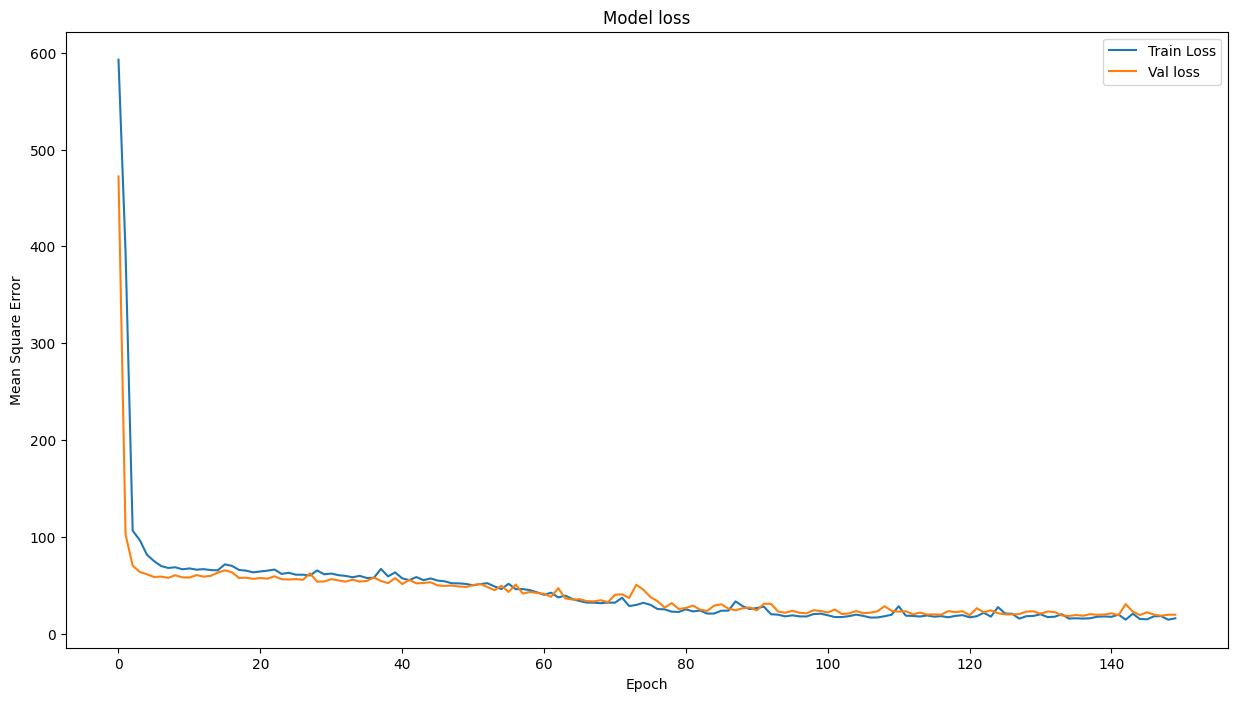

In [ ]:
# show the graph of model loss in trainig and validation 

plt.figure(figsize=(15,8))
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
plt.plot(history.epoch, history.history['loss'],
           label='Train Loss')
plt.plot(history.epoch, history.history['val_loss'],
           label = 'Val loss')
plt.title('Model loss')
plt.legend()


In [ ]:
#check the model performace in test dataset
score = model.evaluate(X_test, y_test, verbose=1)
print('loss value: ', score[0])
print('Mean absolute error: ', score[1])



4/4 [==============================] - 0s 4ms/step - loss: 17.5878 - mae: 2.8730
loss value:  17.58780860900879
Mean absolute error:  2.8730037212371826


In [ ]:
'''=== predict the house price ==='''

# predict house price using the test data 
test_predictions = model.predict(X_test).flatten()
print(test_predictions)


4/4 [==============================] - 0s 4ms/step
[27.04792   39.708103  17.240831  25.778454  17.275078  19.237774
 18.413816  14.769289  21.91427   19.536755  19.77372   18.642794
  6.4234705 19.16696   21.0191    22.57472   19.927116   9.806236
 44.256256  15.802826  27.012949  26.830116  15.921874  22.296705
 18.885035  15.706673  21.337534  12.0272045 19.521317  19.407545
 20.866938  25.391909  19.11443   26.410908  14.067104  13.4968
 34.31356   22.949873  19.95391   22.117434  16.351534  33.618652
 47.02097   19.356619  24.73624   17.218025  17.044878  23.250944
 17.991444  36.131813  20.62661   38.49709   18.189154  26.906403
 47.804516  22.842747  18.425688  37.148815  22.915998  17.320602
 21.971651  33.921352  38.71015   16.394182  24.845886  17.684917
 17.252243  25.35301   34.061768  12.064898  20.830835  29.332907
 12.044887  22.694551  20.45611    9.666275  20.410059  44.08634
 12.520861  13.010118  21.92854   10.882614  22.064772  11.232825
 21.67324   28.109568  18.95

In [ ]:
# show the true value and predicted value in dataframe
true_predicted = pd.DataFrame(list(zip(y_test, test_predictions)), 
                    columns=['True Value','Predicted Value'])
true_predicted.head(10)

,True Value,Predicted Value
0,23.6,27.047920
1,32.4,39.708103
2,13.6,17.240831
3,22.8,25.778454
4,16.1,17.275078
5,20.0,19.237774
6,17.8,18.413816
7,14.0,14.769289
8,19.6,21.914270
9,16.8,19.536755


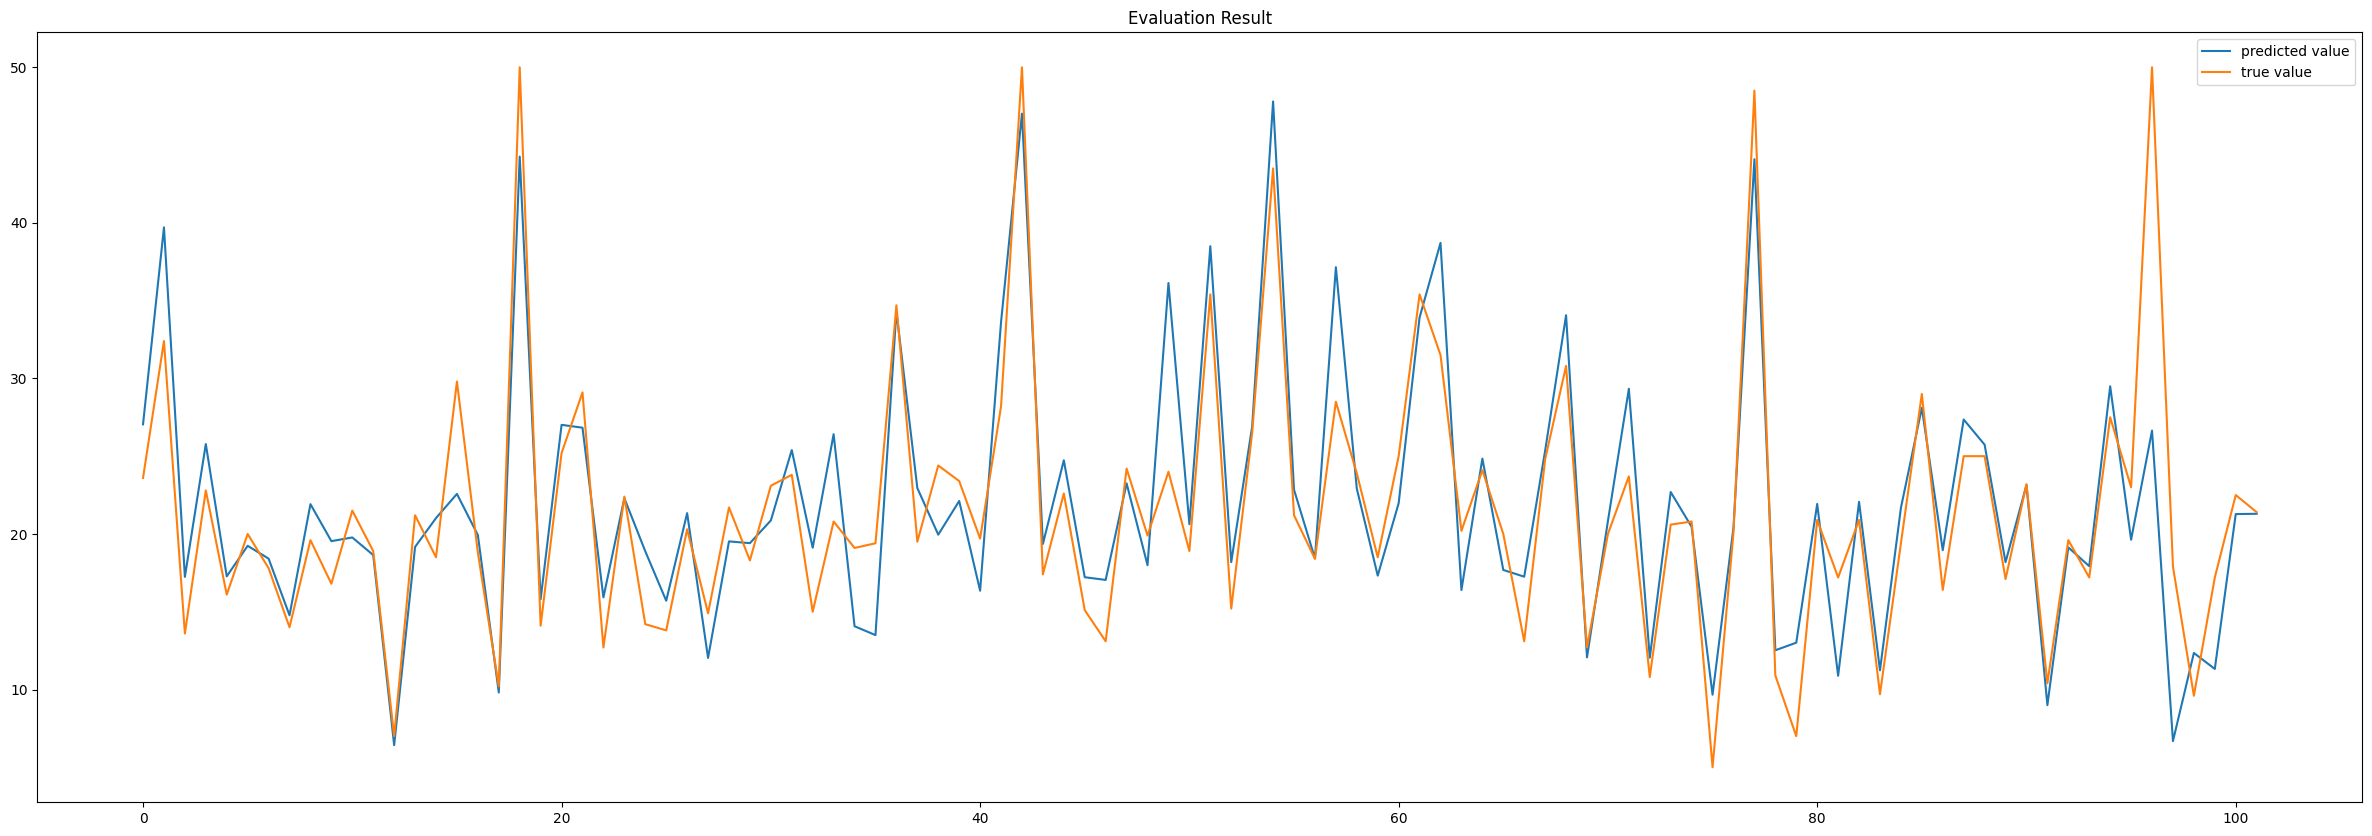

In [ ]:
#visiulize the true value with predicted value (using line graph)
x = test_predictions
y = y_test
plt.figure(figsize=(30,10))
plt.plot(x, label='predicted value')
plt.plot(y, label='true value')
plt.title('Evaluation Result')
plt.legend()
plt.show()

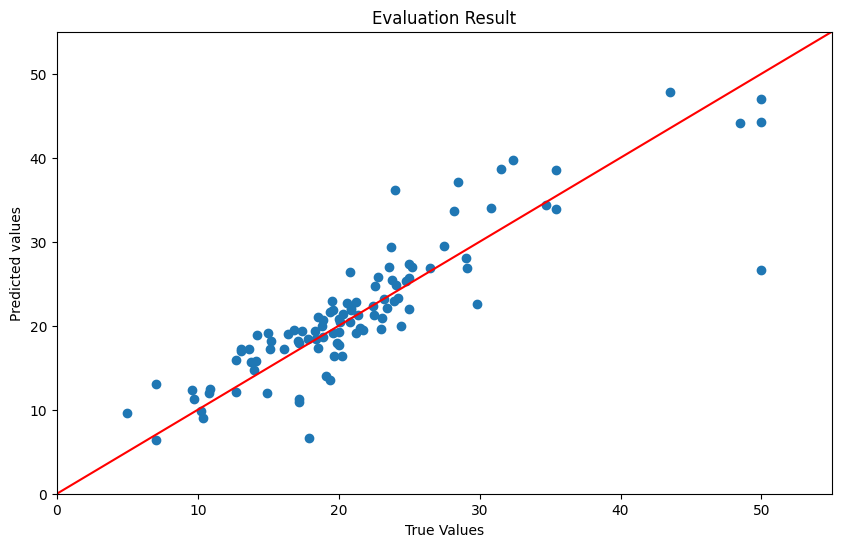

In [ ]:
'''=== Visualize the model evaluation skill ==='''


# visualize the prediction uisng diagonal line
y = test_predictions #y-axis
x = y_test #x-axis
fig, ax = plt.subplots(figsize=(10,6)) # create figure
ax.scatter(x,y) #scatter plots for x,y
ax.set(xlim=(0,55), ylim=(0, 55)) #set limit
ax.plot(ax.get_xlim(), ax.get_ylim(), color ='red') # draw 45 degree diagonal in figure
plt.xlabel('True Values')
plt.ylabel('Predicted values')
plt.title('Evaluation Result')
plt.show()

         ======= Remove outliers from the data set ========
  Tried to see the model perfomance after removing the outliers, the perfomance doesn't 
  show much improvemnt. This might be less data size after remoing the outliers.


In [ ]:
#calcualtes quartiles and interquaterlies
Q1 = house_df.quantile(0.25)
Q3 = house_df.quantile(0.75)
IQR = Q3 - Q1

In [ ]:
house_data = house_df.iloc[:,0:14]
house_data.shape


(506, 14)

In [ ]:
#data after outliers remvoing
clean_data = house_df[~((house_data < (Q1 - 1.5 * IQR)) |(house_data > (Q3 + 1.5 * IQR))).any(axis=1)]
clean_data.shape

(268, 14)

In [ ]:
feature = clean_data.iloc[:,0:13] #  training variables
target = clean_data.iloc[:,13] # target varible
print(feature.head())
print('\n',target.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  

 0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64


In [ ]:
#feature normalization
normalized_feature =  keras.utils.normalize(feature.values)
print(normalized_feature)

[[1.26388341e-05 3.59966795e-02 4.61957387e-03 ... 3.05971776e-02
  7.93726783e-01 9.95908132e-03]
 [5.78529889e-05 0.00000000e+00 1.49769546e-02 ... 3.77071843e-02
  8.40785474e-01 1.93620036e-02]
 [5.85729947e-05 0.00000000e+00 1.51744622e-02 ... 3.82044450e-02
  8.43137761e-01 8.64965806e-03]
 ...
 [1.23765824e-04 0.00000000e+00 2.43009593e-02 ... 4.27762066e-02
  8.08470305e-01 1.14884669e-02]
 [2.24644719e-04 0.00000000e+00 2.44548909e-02 ... 4.30471676e-02
  8.06519433e-01 1.32831260e-02]
 [9.69214289e-05 0.00000000e+00 2.43887924e-02 ... 4.29308164e-02
  8.11392431e-01 1.61092778e-02]]


In [ ]:
# shuffle and split data into train (~80%) and test (~20%)
X_train, X_test, y_train, y_test = train_test_split(normalized_feature, target.values, test_size=0.2, random_state=42) 
print('training data shape: ',X_train.shape)
print('testing data shape: ',X_test.shape)


training data shape:  (214, 13)
testing data shape:  (54, 13)


In [ ]:
#get number of columns in training data
n_cols = X_train.shape[1]

# builds model
model = keras.Sequential()

model.add(keras.layers.Dense(150, activation=tf.nn.relu, 
                       input_shape=(n_cols,)))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(1))

#compile model
model.compile(loss='mse', optimizer='adam', metrics=['mae']) # use metric as mean absolute error

#inspect the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 150)               2100      
                                                                 
 dense_13 (Dense)            (None, 150)               22650     
                                                                 
 dense_14 (Dense)            (None, 150)               22650     
                                                                 
 dense_15 (Dense)            (None, 150)               22650     
                                                                 
 dense_16 (Dense)            (None, 150)               22650     
                                                                 
 dense_17 (Dense)            (None, 1)                 151       
                                                                 
Total params: 92,851
Trainable params: 92,851
Non-trai

In [ ]:

#train model
early_stop = EarlyStopping(monitor='val_loss', patience=20) # stops training when it doesn't show improvemnet.

history = model.fit(X_train, y_train, epochs=300, 
          validation_split=0.2, verbose=1, callbacks=[early_stop])


Epoch 1/300
6/6 [==============================] - 2s 72ms/step - loss: 476.7075 - mae: 21.2457 - val_loss: 411.2333 - val_mae: 19.9129
Epoch 2/300
6/6 [==============================] - 0s 20ms/step - loss: 416.2877 - mae: 19.7529 - val_loss: 300.9928 - val_mae: 16.9183
Epoch 3/300
6/6 [==============================] - 0s 17ms/step - loss: 257.8112 - mae: 15.0585 - val_loss: 76.8616 - val_mae: 7.9147
Epoch 4/300
6/6 [==============================] - 0s 16ms/step - loss: 55.3213 - mae: 5.9860 - val_loss: 97.1495 - val_mae: 9.1221
Epoch 5/300
6/6 [==============================] - 0s 17ms/step - loss: 74.5788 - mae: 7.6053 - val_loss: 15.7022 - val_mae: 3.2072
Epoch 6/300
6/6 [==============================] - 0s 19ms/step - loss: 37.0084 - mae: 4.6644 - val_loss: 34.3140 - val_mae: 4.7905
Epoch 7/300
6/6 [==============================] - 0s 21ms/step - loss: 45.4681 - mae: 5.2958 - val_loss: 15.9014 - val_mae: 3.0216
Epoch 8/300
6/6 [==============================] - 0s 19ms/step - 

In [ ]:
#check the model performace in test dataset
score = model.evaluate(X_test, y_test, verbose=1)
print('loss value: ', score[0])
print('Mean absolute error: ', score[1])



2/2 [==============================] - 0s 10ms/step - loss: 16.2292 - mae: 2.8839
loss value:  16.229169845581055
Mean absolute error:  2.8839049339294434


In [ ]:

# predict house price using the test data 
test_predictions = model.predict(X_test).flatten()
print(test_predictions)


2/2 [==============================] - 0s 8ms/step
[18.471294 23.490692 20.706505 18.14676  18.52502  22.58464  16.531364
 22.249363 22.214884 23.31978  18.050749 21.878294 22.925467 21.486427
 20.687609 22.542925 22.421171 22.738245 20.430132 18.576689 19.57483
 21.073366 19.567446 22.405909 22.688839 23.038502 20.447325 24.185104
 22.895863 18.761473 24.280392 23.017338 21.722517 16.715853 21.258646
 20.18843  18.288115 20.88268  24.036629 18.057852 20.32896  18.816927
 20.885841 16.632034 21.520952 19.623514 21.753244 21.874807 20.251534
 22.473747 16.536362 16.616535 22.872866 16.899448]


In [ ]:
# show the true value and predicted value in dataframe
true_predicted = pd.DataFrame(list(zip(y_test, test_predictions)), columns=['True Value','Predicted Value'])
true_predicted.head(10)

,True Value,Predicted Value
0,23.0,18.471294
1,18.7,23.490692
2,14.5,20.706505
3,19.1,18.146761
4,18.1,18.525021
5,23.3,22.584641
6,17.7,16.531364
7,23.2,22.249363
8,18.9,22.214884
9,28.0,23.319780


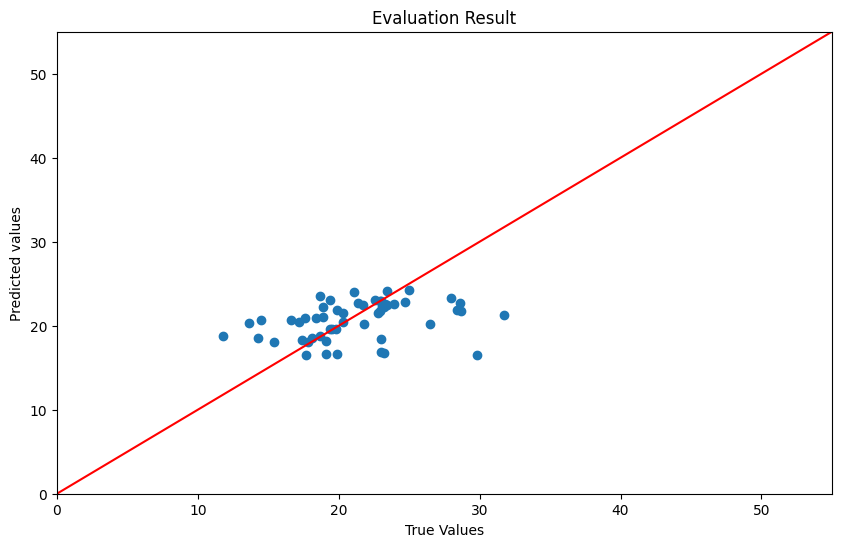

In [ ]:
# visualize the prediction uisng diagonal line
y = test_predictions #y-axis
x = y_test #x-axis
fig, ax = plt.subplots(figsize=(10,6)) # create figure
ax.scatter(x,y) #scatter plots for x,y
ax.set(xlim=(0,55), ylim=(0, 55)) #set limit
ax.plot(ax.get_xlim(), ax.get_ylim(), color ='red') # draw 45 degree diagonal in figure
plt.xlabel('True Values')
plt.ylabel('Predicted values')
plt.title('Evaluation Result')
plt.show()